In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("./images/image.jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
def image_procesing(image):
    grayimage = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    
    _,binimage = cv2.threshold(grayimage,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(binimage, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 75, apertureSize=3)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return image
    
    cnt = max(contours, key=cv2.contourArea)
    rect = cv2.minAreaRect(cnt)
    angle = rect[2]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h,w) = grayimage.shape[:2]
    center = (w//2 ,h//2)
    M = cv2.getRotationMatrix2D(center,angle, 1.)

    rotated_image = cv2.warpAffine(grayimage,M,(w,h),flags= cv2.INTER_CUBIC, borderMode= cv2.BORDER_REPLICATE)
    
    return rotated_image

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [32]:
import easyocr

reader = easyocr.Reader(['en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
from collections import Counter
import pytesseract
from PIL import Image

# Cargar la imagen
image_path = './images/image.jpeg'
image = Image.open(image_path)

# Usar pytesseract para reconocer letras (solo mayúsculas A-Z)
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'
text = pytesseract.image_to_string(image, config=custom_config)

# Contar frecuencia de cada letra
letter_counts = Counter(text.replace("\n", "").replace(" ", ""))

# Asegurarnos de incluir todas las letras A-Z aunque no aparezcan
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
result = {letter: letter_counts.get(letter, 0) for letter in alphabet}

result

{'A': 33,
 'B': 10,
 'C': 17,
 'D': 12,
 'E': 17,
 'F': 22,
 'G': 11,
 'H': 29,
 'I': 5,
 'J': 1,
 'K': 12,
 'L': 8,
 'M': 6,
 'N': 18,
 'O': 63,
 'P': 15,
 'Q': 4,
 'R': 17,
 'S': 38,
 'T': 21,
 'U': 3,
 'V': 11,
 'W': 6,
 'X': 2,
 'Y': 12,
 'Z': 7}

In [10]:
def correct_orientation_tesseract(image):
    
    osd = pytesseract.image_to_osd(image)
    
    lines = osd.split('\n')
    for line in lines:
        if 'Rotate: ' in line:
            rotation = int(line.split(': ')[1])
            return rotation
    
    return image

TesseractError: (1, 'Estimating resolution as 313 Too few characters. Skipping this page Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')

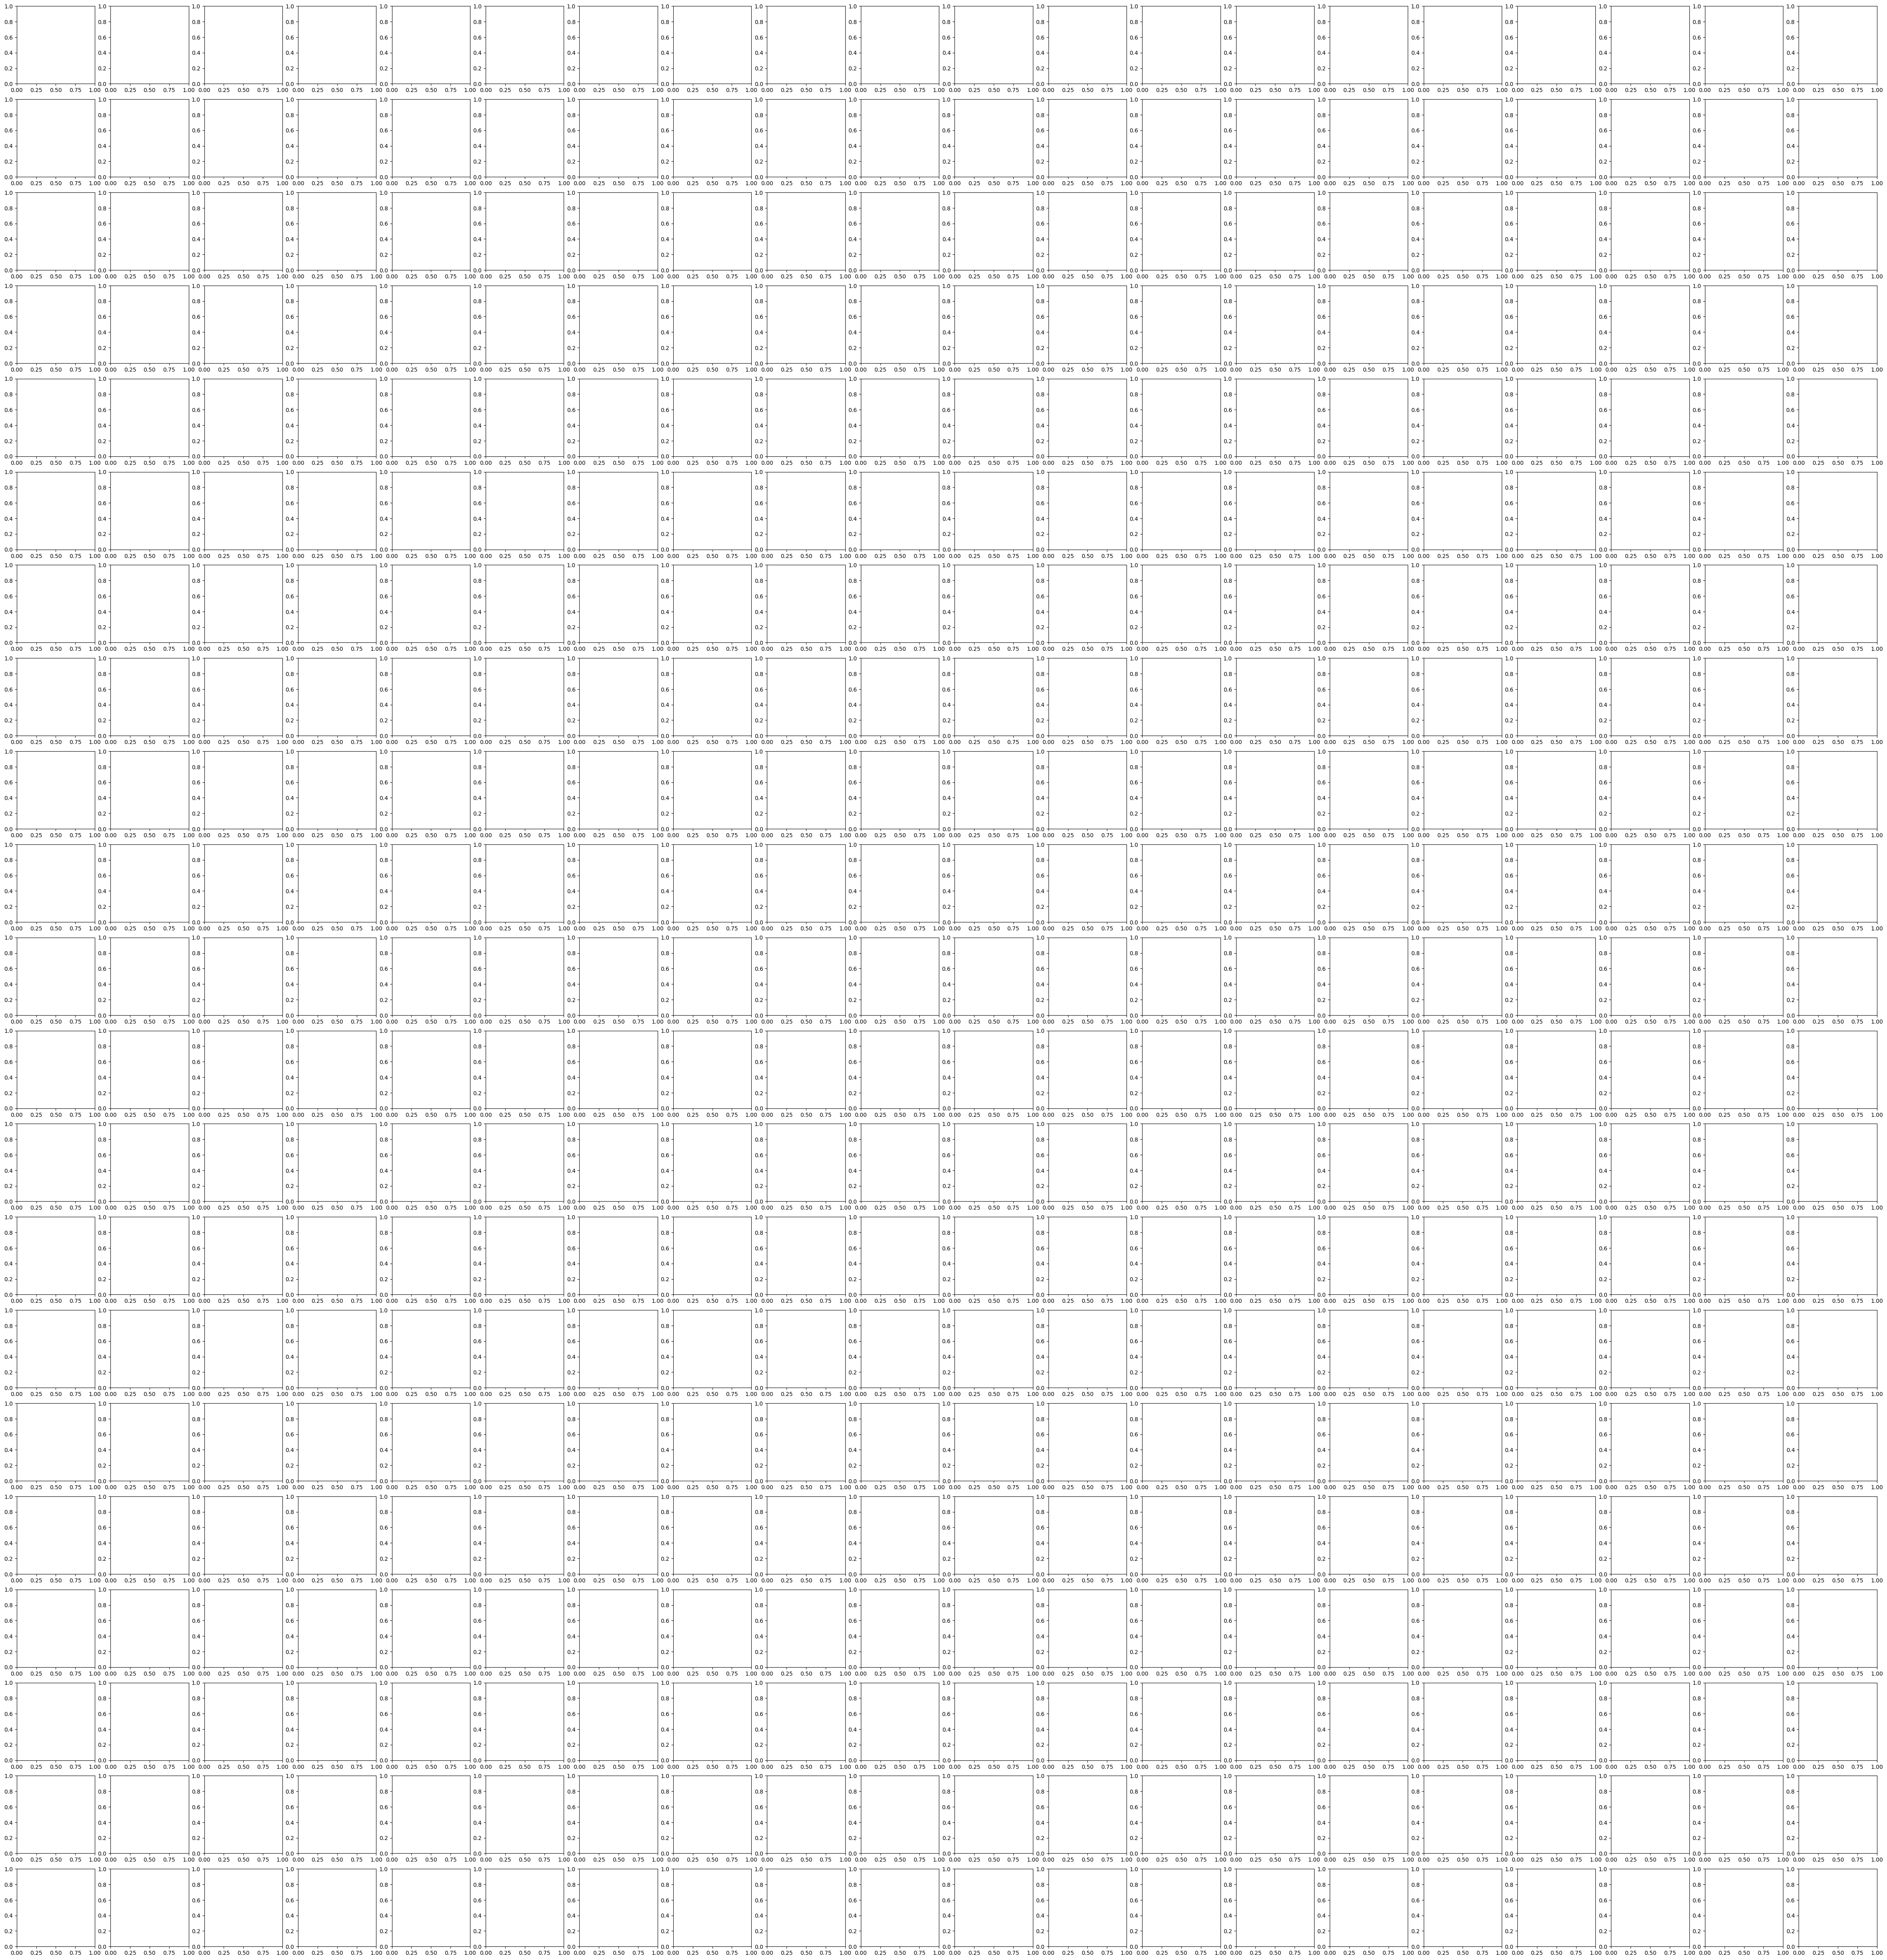

In [ ]:
k = 20
n, m = image.shape[:2]
h, w = n // k, m // k
letters = []
custom_config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'
num_rows = int(np.ceil(n / h))
num_cols = int(np.ceil(m / w))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
axes = np.atleast_2d(axes)

for i in range(0, n - h + 1, h):
    for j in range(0, m - w + 1, w):
        patch = image[i:i + h, j:j + w]
        patch = infer_letter_from_patch(patch)
        row_idx = i // h
        col_idx = j // w
        axes[row_idx, col_idx].imshow(patch)
        axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

In [13]:
def count_letters(text):
    # Inicializar contador para cada letra
    letter_count = {}
    for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        letter_count[char] = 0
    
    # Contar cada letra en el texto
    for char in text:
        if char.isalpha():
            letter_count[char.upper()] += 1
    
    # Imprimir en el formato requerido
    for letter in sorted(letter_count.keys()):
        print(f"{letter}: {letter_count[letter]}")

# Texto de entrada
text = """TFGTZYUXVHSITYFHOFRX
RNSAGYTFFEFEBHLGQUKD
REHEDLRUYVCAGGXQMCKI
ZQXAGVAZYWFIJKYCZFLP
WYOJGHMFGAFHFDBGJCNJ
TMFCLDCFIOTELCZYHJLW
EMLSKGAUJBCFKQJBJQRT
COAUMVOLMWKYCUUQCYEB
LPIKZNQLIGEBGRTIEBFG
XUOGFSCNHSHGCWSRTUBU
GWYREVWLXFNPQLUAIJSM
URNWCFTNFMDFQVGYSXXE
WQDCNCDSRVBENSPYASVI
WBNOSOWGBKHNFGYTYMBO
BXWWJWGYLJWKGCUOLDYP
IQTQOQSPODINZIOUUPCQ
BGTWGBWTVHBFTCVLXKZW
EUIAUIVBZTOZUQEIVENW
SKNZRBZMQBINCAJLTLFH
CNVEQYDWIQJMIOHEAJHW"""

# Contar y mostrar resultados
count_letters(text)

A: 12
B: 19
C: 21
D: 10
E: 17
F: 23
G: 23
H: 14
I: 18
J: 14
K: 11
L: 17
M: 11
N: 16
O: 15
P: 7
Q: 18
R: 11
S: 14
T: 17
U: 18
V: 13
W: 21
X: 10
Y: 18
Z: 12


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# --- Configuración ---
BATCH_SIZE = 128
EPOCHS = 10
LR = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Transformaciones con rotaciones aleatorias ---
transform = transforms.Compose([
    transforms.RandomRotation(degrees=(0, 360)),  # Rotación completa
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))          # Normalizar a [-1, 1]
])

# --- Dataset EMNIST Letters ---
# split='letters' -> etiquetas 1-26, donde 1=A, 2=B, ...
train_dataset = datasets.EMNIST(
    root="./data",
    split="letters",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.EMNIST(
    root="./data",
    split="letters",
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# --- Modelo CNN sencillo ---
class LetterCNN(nn.Module):
    def __init__(self):
        super(LetterCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 26)  # 26 letras A-Z

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = LetterCNN().to(DEVICE)

# --- Entrenamiento ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        labels = labels - 1  # EMNIST Letters empieza en 1, pasamos a 0-index

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}")

# --- Evaluación ---
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        labels = labels - 1
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# --- Guardar modelo ---
torch.save(model.state_dict(), "emnist_letters_rot_invariant.pth")

100%|██████████| 562M/562M [04:32<00:00, 2.06MB/s] 


PermissionError: [WinError 5] Access is denied: './data\\EMNIST\\raw\\gzip'